Binary classification of problem of students graduating or dropping out
Algorithm: Support Vector Machine (SVM)
Author: Demetreous Stillman

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [4]:
# Load the CSV file into a dataFrame
df_with_enrolled = pd.read_csv("/Users/demetreousstillman/Desktop/CSE_5160_Project/dropout_data.csv", sep=";")

# Filter rows where the 'Target' column is not equal to 'Enrolled'
df = df_with_enrolled[df_with_enrolled['Target'] != 'Enrolled']

# Define a mapping dictionary to convert categories to numerical values
target_mapping = {'Graduate': 0, 'Dropout': 1}
# Use the mapping dictionary to replace values in the "Target" column
df['Target'] = df['Target'].replace(target_mapping)

# X contains all columns except the "Target" column
X = df.drop("Target", axis=1) 
# y contains only the "Target" column
y = df["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/9g/2y_gmxqn22l8hl960qphhhmw0000gn/T/ipykernel_41529/3298502298.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].replace(target_mapping)


In [5]:
# Code to Determine the best kernel for the SVM 

# Various kernels to create SVMs from
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create SVM models with different kernel functions
for kernel in kernels:
    # Create SVM Classifier
    clf_svm = SVC(kernel=kernel)
    
    # Train the SVM model
    clf_svm.fit(X_train, y_train)
    
    # Get support vectors
    support_vectors = clf_svm.support_vectors_
    
    # Predict with SVM
    y_train_pred = clf_svm.predict(X_train)
    
    # Calculate SVM training accuracy
    accuracy_svm = accuracy_score(y_train, y_train_pred)
    
    # Print the training accuracy and support vectors for each kernel
    print()
    #format string for output
    print(f"SVM Training Accuracy ({kernel} kernel):", accuracy_svm)
    print("Support Vectors:")
    print(support_vectors)
    print()
    print("Predict:")
    print(clf_svm.predict(X))
    
    mean_svm = mean_squared_error(y_train, y_train_pred)
    #format string for output
    print(f"SVM Training Error ({kernel} kernel):", mean_svm)
    print()


SVM Training Accuracy (linear kernel): 0.9149449035812672
Support Vectors:
[[ 2.   39.    1.   ...  7.6   2.6   0.32]
 [ 1.    1.    2.   ...  9.4  -0.8  -3.12]
 [ 1.    1.    1.   ... 12.4   0.5   1.79]
 ...
 [ 1.   39.    1.   ... 11.1   0.6   2.02]
 [ 4.   39.    1.   ...  9.4  -0.8  -3.12]
 [ 1.    1.    1.   ... 11.1   0.6   2.02]]

Predict:
[1 0 1 ... 1 0 0]
SVM Training Error (linear kernel): 0.08505509641873278


SVM Training Accuracy (poly kernel): 0.6060606060606061
Support Vectors:
[[ 2.   39.    1.   ...  7.6   2.6   0.32]
 [ 1.   43.    1.   ...  7.6   2.6   0.32]
 [ 1.   17.    1.   ... 11.1   0.6   2.02]
 ...
 [ 1.   17.    1.   ...  9.4  -0.8  -3.12]
 [ 1.   39.    1.   ... 12.4   0.5   1.79]
 [ 1.   42.    1.   ... 15.5   2.8  -4.06]]

Predict:
[0 0 0 ... 0 0 0]
SVM Training Error (poly kernel): 0.3939393939393939


SVM Training Accuracy (rbf kernel): 0.6060606060606061
Support Vectors:
[[ 2.   39.    1.   ...  7.6   2.6   0.32]
 [ 1.   43.    1.   ...  7.6   2.6   0.

In [6]:
# The linear kernel had the best training accuracy so it was chosen
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
scores = cross_val_score(clf_svm, X_train, y_train, cv=10)
print("Cross Validation Scores Array:")
print(scores)
print("\nMean Cross Validation Score:", np.mean(scores))
print("Standard Deviation of Cross Validation Scores:", np.std(scores))

Cross Validation Scores Array:
[0.90721649 0.94158076 0.89690722 0.89003436 0.90689655 0.92413793
 0.93103448 0.88275862 0.87931034 0.91034483]

Mean Cross Validation Score: 0.9070221590235811
Standard Deviation of Cross Validation Scores: 0.019551196409328016


In [8]:
# Evaluate training accuracy
y_train_pred = clf_svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
y_test_pred = clf_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9149
Test Accuracy: 0.9160


In [9]:
# Evaluate training error
train_error = mean_squared_error(y_train, y_train_pred)
print(f"Training Error: {train_error:.4f}")

# Evaluate test accuracy
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0851
Test Error: 0.0840


In [10]:
target_names = ['Graduate', 'Dropout']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.91      0.95      0.93       449
     Dropout       0.92      0.86      0.89       277

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



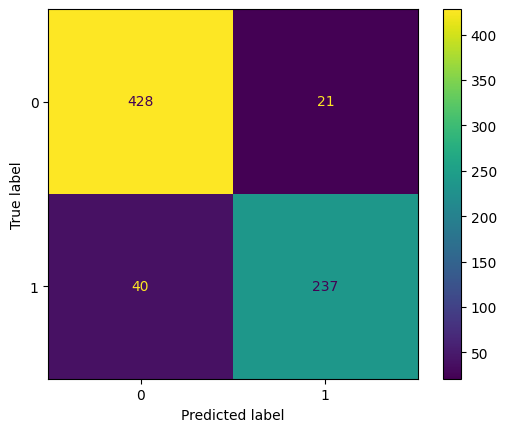

In [11]:
# Creates confusion matrix diagram
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()